# HR Analytics Employee Attrition & Performance

## Background


McCurr Health Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. 

**Attrition Rate Definition**


Employee Attrition Rate is calculated as the percentage of employees who left the company in a given period to the total average number of employees within that period.

## Data Definition

**Data Dictionary**

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

**In the real world, you will not find definitions for some of your variables. It is the part of the analysis to figure out what they might mean**.


## Import Needed Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.cm import get_cmap
import matplotlib.ticker as ticker
import os
import sys
from IPython.display import Image
import warnings    # We want to suppress warnings
warnings.filterwarnings("ignore")    # Ignore warnings

%reload_ext autoreload
%autoreload 2


### Import Helper Functions

In [25]:
# Append the directory to your python path using sys
sys.path.append('../utilities')

# Import the utils.py file
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/christopherpaskins/Projects/Machine Learning/machine-learning/Exploratory Data Analysis/../utilities/utils.py'>

## Read in the Dataset

In [26]:

# Read the dataset file
data = pd.read_excel('https://drive.google.com/uc?export=download&id=1LpTWVhgsUbROy45PhObg4sKqOyYPl35C')

In [27]:
data.head(5)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## High Level Data Checks

**General Info**

In [28]:
data.shape

(2940, 34)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

In [30]:
data.duplicated().value_counts()

False    2940
Name: count, dtype: int64

In [31]:
data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**General Observations**
* There are 2940 rows under 34 columns.
* There are no null or missing data.
* There are no duplicates.
* There are two columns with only 1 unique value. (StandardHours and Over18)
* There is one column withnthe same amount of unique values as the number of rows (EmployeeID)

## Start the EDA

In [32]:
# use the describe method to get summary level information about the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.00,3.0,4.00,4.0


**Observations**
* The average age is 36 years, there are very young people with 18 years (young trainees or interns?) and people with 60 years (managers with many years of work?).
* There are people who live very close to work, almost next door, and others are almost an hour's drive away!
* Salaries are a world of their own! The average is 6500 usd, the lowest earners reach 1000 usd (the young trainees?) and the highest earners almost 20000 usd (that 60 year old boss with many years behind him?).
* There are employees who have been working for almost 40 years and others who have just started! The average, however, is 7 years (I don't think that's bad at all).

**Lets look at our target variable for type and balance**

There are various degrees of imbalance, and what is considered imbalanced can depend on the specific problem, the total size of the dataset, and the number of classes involved. Here are some general guidelines to understand when a dataset is considered imbalanced:

**Minor Imbalance:** This is when the class distribution is slightly off from being equal but not to a degree that severely impacts model performance. An example could be a binary classification problem with a class distribution of 60% for one class and 40% for the other.

**Moderate Imbalance**: Here, the imbalance starts to become more pronounced. For instance, in a binary classification problem, a distribution of 70% for one class and 30% for the other might be considered moderately imbalanced.

**Severe Imbalance:** This is when the class distribution is highly skewed, making one class significantly underrepresented. An example would be having 90% of the data belonging to one class and only 10% to the other in a binary classification scenario.

The specific threshold at which an imbalance becomes problematic varies, but generally, datasets where one class represents less than 20% of the total can start to introduce significant challenges for many standard machine learning models. These challenges include the model's tendency to overpredict the majority class, as doing so can still achieve high accuracy despite poor minority class performance.

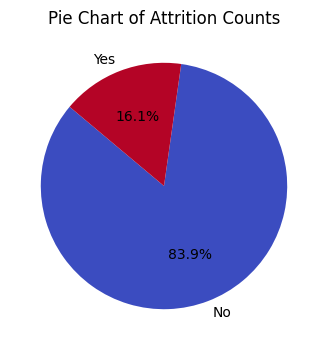

In [33]:
# Using value_counts() to get the counts of unique values in the 'Attrition' column
category_counts = data['Attrition'].value_counts()

# Generate a coolwarm color palette
coolwarm_palette = cm.get_cmap('coolwarm', len(category_counts))

# Plotting the pie chart
plt.figure(figsize=(4, 4))  # Optional: specifies the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=[coolwarm_palette(i) for i in range(len(category_counts))])
plt.title('Pie Chart of Attrition Counts')
plt.show()

Our **target varaible is categorical**, and **is imbalanced**. Let's convert it to numeric

In [34]:
#create a simple dict to help us convert
y_dict = {"Yes":1,"No":0}

#map the data to the dict
data["Attrition_numeric"] = data["Attrition"].map(y_dict)

In [35]:
# verify it worked as intended
data['Attrition_numeric'].value_counts(normalize=True)

Attrition_numeric
0    0.838776
1    0.161224
Name: proportion, dtype: float64

**Let's check to see of we can drop any columns that are not needed in the analysis, and will not give any value**
* These can be things like:
  - columns with all unique values
  - columns with only 1 distinct value
  - any columns you have transformed, i.e. the target variable datatype

*From the above general analysis, we can remove the columns that provide ***no value in our analysis***, and since we transformed the ***Attrition*** column, we can drop that as well.*

In [36]:
data.drop(['EmployeeNumber', 'Over18', 'StandardHours',"Attrition"], axis="columns", inplace=True)

I am going to separate the numerical columns from the categorical columns; using describe makes it very easy 

In [37]:
# numeric and categoric
num_col = data.describe().columns.tolist()
cat_col = data.describe(include="object").columns.tolist()

### Detecting Multicollinearity

Use a heatmap to see the correlation between the variables. 

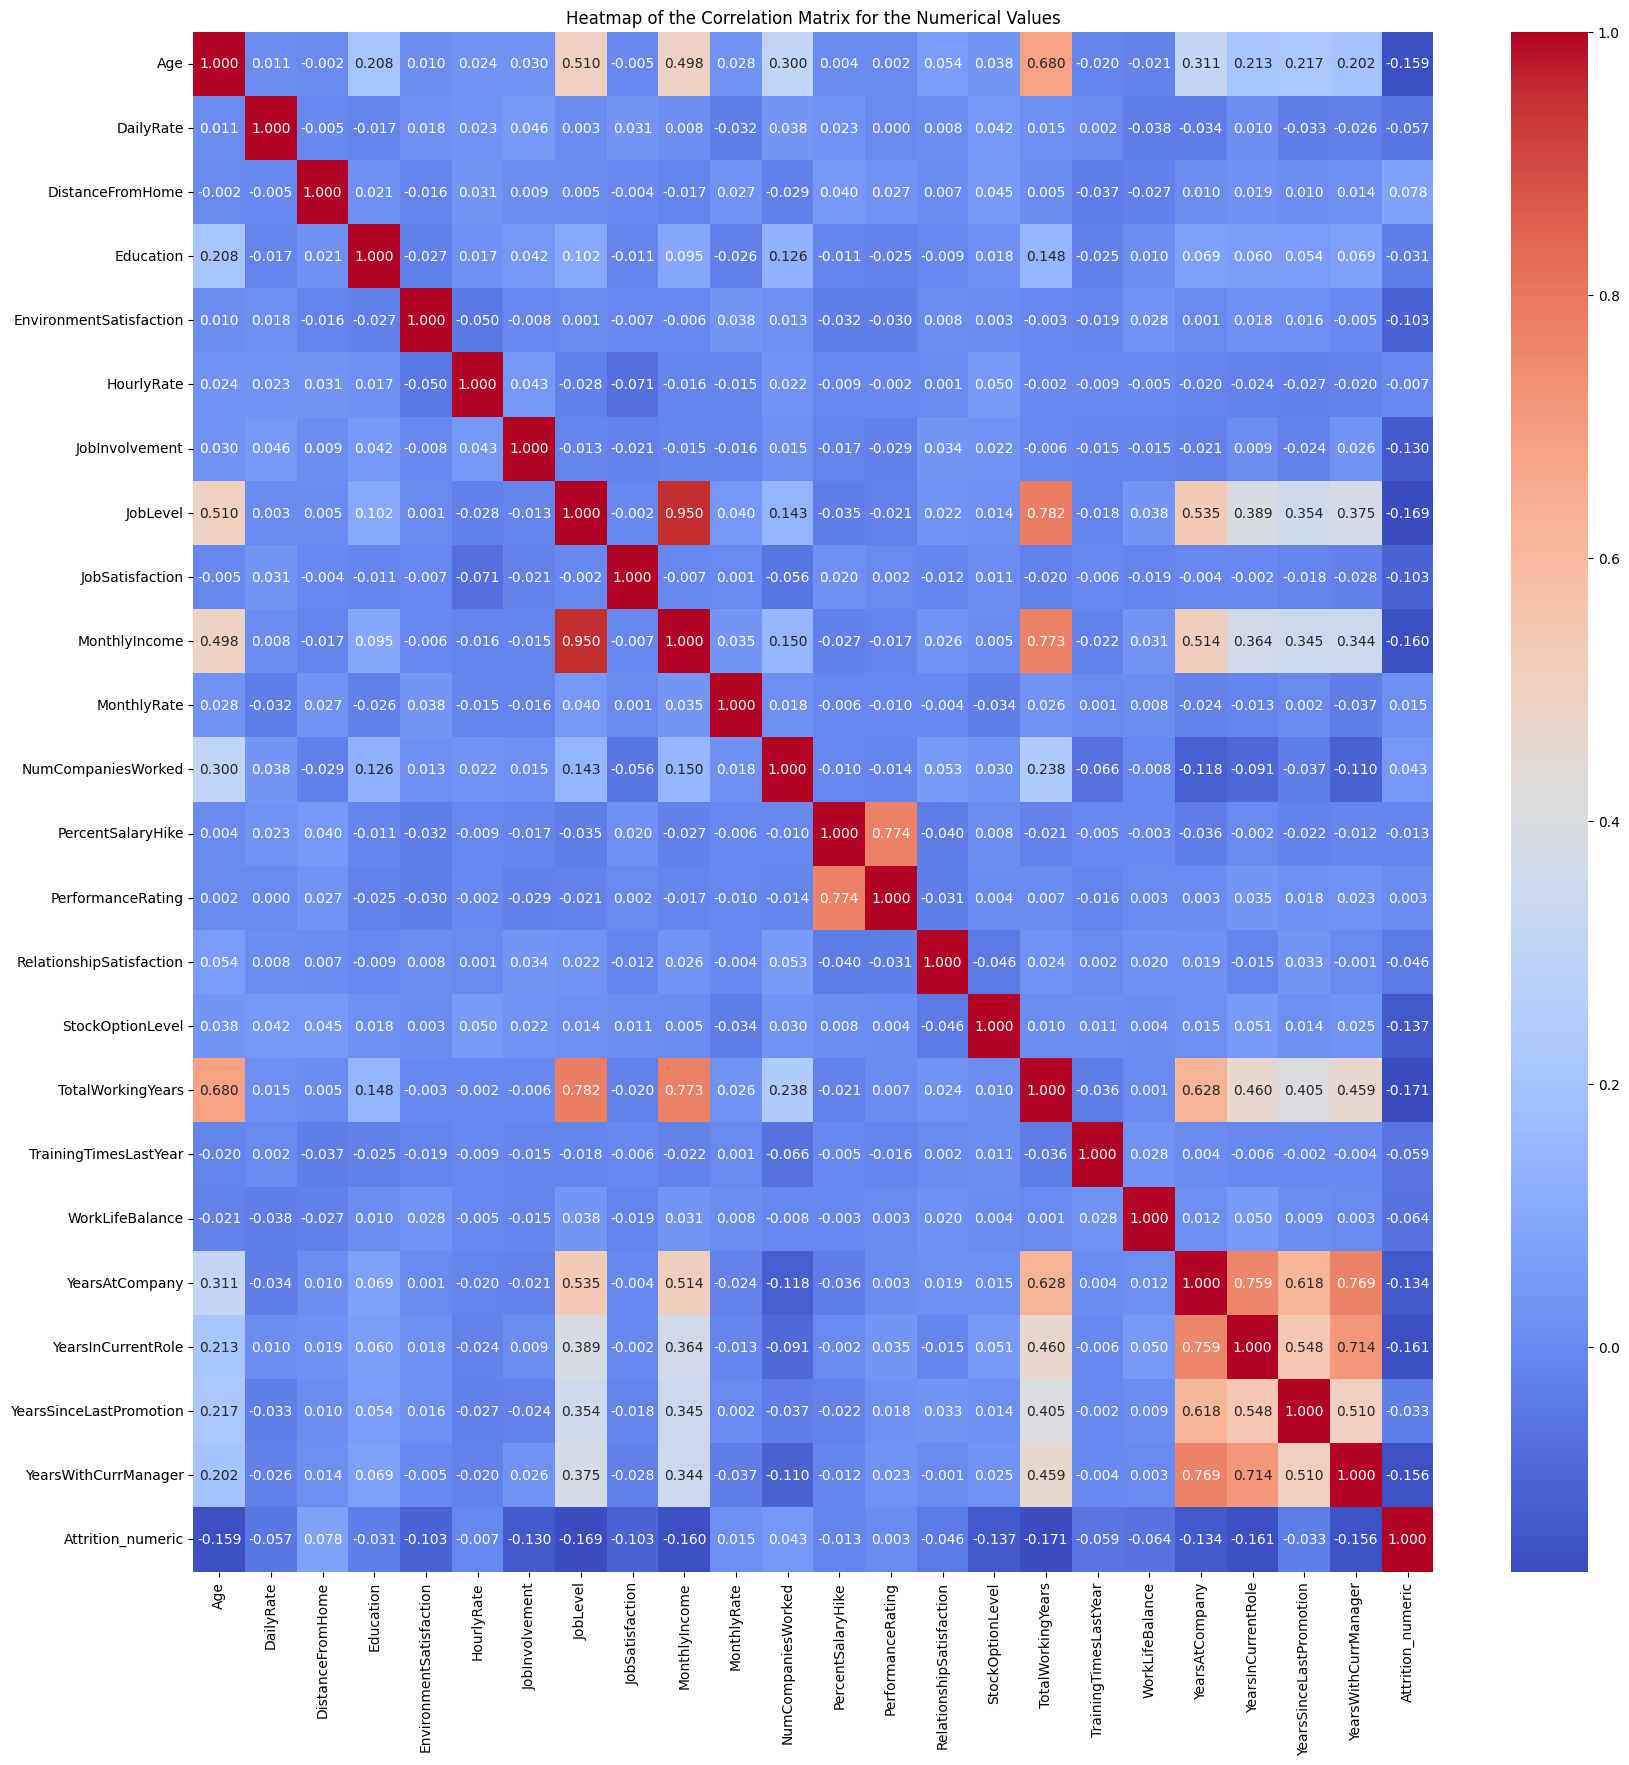

In [38]:
corr_matrix = utils.corr_matrix(data[num_col], figsize=(20,20))

**Let's list the correlations that are greater than .5**

In [39]:
# Convert to long format
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ['Variable1', 'Variable2', 'Correlation']

# Filter based on a threshold (for example, |Correlation| > 0.5)
threshold = 0.5
filtered_corr = corr_long[(corr_long['Correlation'].abs() > threshold) & (corr_long['Variable1'] != corr_long['Variable2'])]

# Removing duplicate pairs
filtered_corr = filtered_corr.loc[pd.DataFrame(np.sort(filtered_corr[['Variable1', 'Variable2']], axis=1), index=filtered_corr.index).drop_duplicates(keep='first').index]

print(filtered_corr)

                   Variable1                Variable2  Correlation
7                        Age                 JobLevel     0.509604
16                       Age        TotalWorkingYears     0.680381
177                 JobLevel            MonthlyIncome     0.950300
184                 JobLevel        TotalWorkingYears     0.782208
187                 JobLevel           YearsAtCompany     0.534739
232            MonthlyIncome        TotalWorkingYears     0.772893
235            MonthlyIncome           YearsAtCompany     0.514285
301        PercentSalaryHike        PerformanceRating     0.773550
403        TotalWorkingYears           YearsAtCompany     0.628133
476           YearsAtCompany       YearsInCurrentRole     0.758754
477           YearsAtCompany  YearsSinceLastPromotion     0.618409
478           YearsAtCompany     YearsWithCurrManager     0.769212
501       YearsInCurrentRole  YearsSinceLastPromotion     0.548056
502       YearsInCurrentRole     YearsWithCurrManager     0.71

**Observations**

We see that there is Multicollinearity; it is normal because there are variables that are related to each other, for example salary and working years. You can dig into a little more with PCA and other types of analysis. For this purpose this will suffuce.

### A quick summary of the categorical variables!

In [40]:
data.describe(include="object").T

,count,unique,top,freq
BusinessTravel,2940,3,Travel_Rarely,2086
Department,2940,3,Research & Development,1922
EducationField,2940,6,Life Sciences,1212
Gender,2940,2,Male,1764
JobRole,2940,9,Sales Executive,652
MaritalStatus,2940,3,Married,1346
OverTime,2940,2,No,2108


We see that the most frequent in this company is a person who travels rarely, from the Research & Development department , educated in Life Sciences , gender Male, Married, Sales Executive and no OverTIme

### Visualizing data is always a great help, let's get to it!

**Let's look at the ***Attrition rate*** for all the categprical variables and their sub-categories**

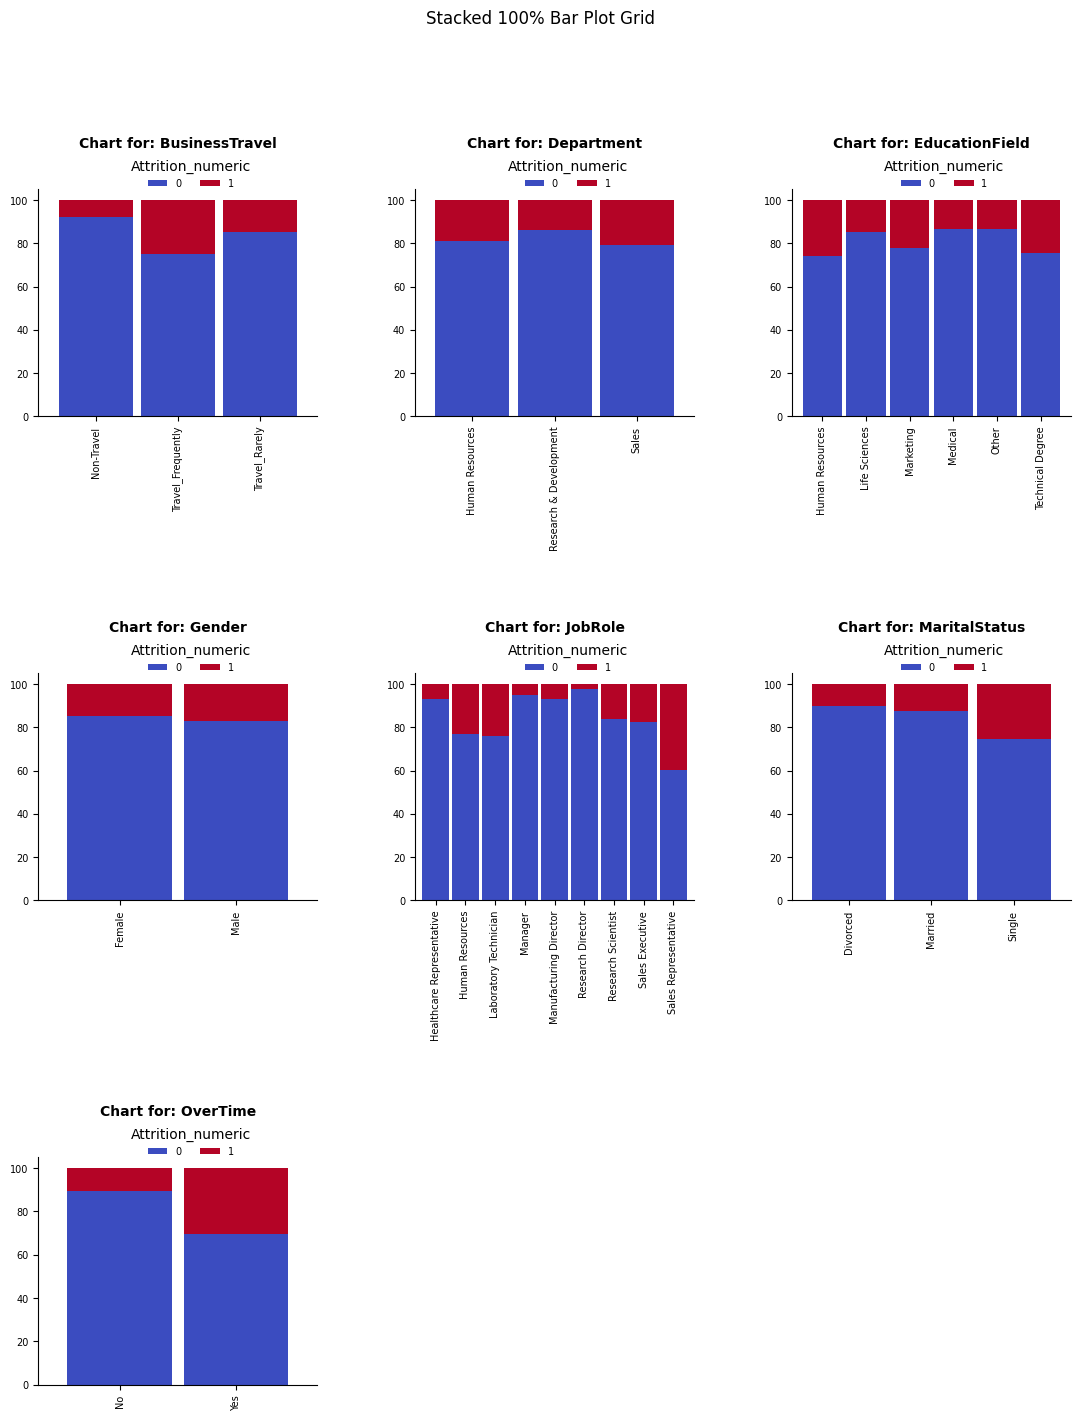

In [47]:
utils.stacked_barplot_grid(data, cat_col, 'Attrition_numeric', max_columns=3)

**Observations**

* Among employees who travel a lot, the attrition rate is much higher
* HR, Marketing and those with Technical Degrees have higher attrition
* Job roles that include HR, Labratory Technicians and Sales Representatives have the highest attrition
* Single people have the highest propensity to attrite
* If you have to work overtime, your attrition rate is much higher.

**Let's take a look at a pivot table of the ***Attrition Rate*** for the ***Business Travel*** and ***Overtime*** columns.**

In [42]:
data.pivot_table("Attrition_numeric",index="JobRole",columns=["BusinessTravel", "OverTime"]).style.background_gradient(cmap='Greens', low=-0, high=1, axis=0)

**Observations**

* We can see that among the sales representatives who travel frequently and work overtime, 100% percent are not very happy! 
* It is also significant in Human resources as well at about a 50% attrition rate
* Labratory technicians that work overtime (whether they travel or not) attrite at a 50% rate

### Age

**Let's look at age impact on ***Atrrition rate*****

First we use the cut function to create four groups according to their ages and then groupby and value counts(normalize) to see the percentages.

In [43]:
cut_age = pd.cut(data["Age"],bins=[18,30,40,50,60],include_lowest=False)
data.groupby(cut_age)["Attrition_numeric"].value_counts(normalize=True).unstack()

Attrition_numeric,0,1
Age,,
"(18, 30]",0.746032,0.253968
"(30, 40]",0.862682,0.137318
"(40, 50]",0.894410,0.105590
"(50, 60]",0.874126,0.125874


**Observations**

* The 18-30 agre group is twice as likely to attrite.

**Let's plot it**

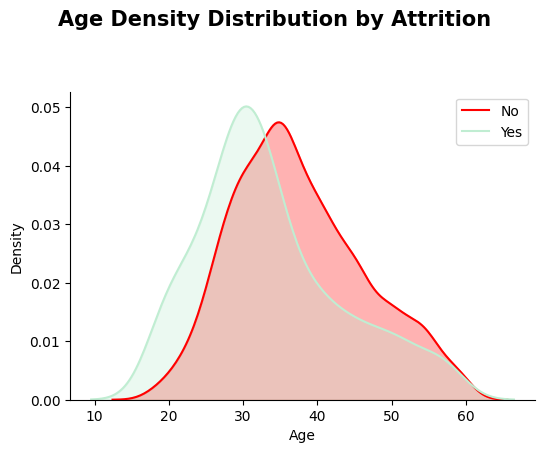

In [44]:
# age
plt.figure(figsize=(6,4))
ax = sns.distplot(data[data['Attrition_numeric'] == 0]['Age'],hist=False,label="No",color="r")
ax = sns.distplot(data[data['Attrition_numeric'] == 1]['Age'],hist=False,label="Yes",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(5,0.064,"Age Density Distribution by Attrition",fontsize=15,fontweight='bold') 
plt.show(block=False)

Working far away from home is also important, here we see that from 10 km away it begins to be noticed in the attrition rate 

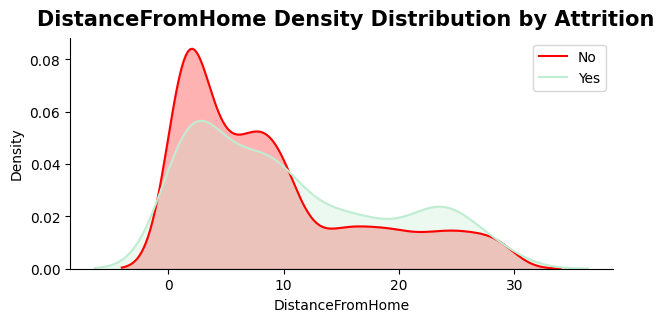

In [45]:
plt.figure(figsize=(7,3))
ax = sns.distplot(data[data['Attrition_numeric'] == 0]['DistanceFromHome'],hist=False,label="No",color="r")
ax = sns.distplot(data[data['Attrition_numeric'] == 1]['DistanceFromHome'],hist=False,label="Yes",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(-11.35,0.093,"DistanceFromHome Density Distribution by Attrition",
        fontsize=15,        
         fontweight='bold') 

plt.show(block=False)

With the cut function I will make three groups: those who live up to 10,20 and 30 km away from work; then we make groupby and with value counts (normalize) we see the percentages in relation to Attriction

In [46]:
cut_distance = pd.cut(data["DistanceFromHome"],bins=[1,10,20,30],include_lowest=False)
data.groupby(cut_distance)["Attrition_numeric"].value_counts(normalize=True).unstack()

Attrition_numeric,0,1
DistanceFromHome,,
"(1, 10]",0.855746,0.144254
"(10, 20]",0.800000,0.200000
"(20, 30]",0.779412,0.220588


We find that as the distance increases, the attrition rate rises from 14 to 22 percent.

**Resulting Observations Summary**

* The dataset is ***imbalanced*** with the attrition rate at 16.1%.
* ***EmployeeNumber***, ***Over18***, and ***StandardHours*** can be removed from the analysis as it provides no value.
* There is ***multicollinearity***, it is normal because there are variables that are related to each other, for example salary and working years. 
* Among employees who travel a lot, the attrition rate is much higher
* ***HR, Marketing*** and those with ***Technical Degrees*** have higher attrition
* Job roles that include ***HR, Labratory Technicians and Sales Representatives*** have the highest attrition
* ***Single people*** have the highest propensity to attrite
* If you have to work ***overtime***, your attrition rate is much higher.
* The ***sales representatives who travel frequently and work overtime***, ***100%*** percent are not very happy! 
* It is also significant in ***Human Resources*** as well at about a 50% attrition rate for the above condition.
* ***Labratory technicians that work overtime*** (whether they travel or not) attrite at a 50% rate
* The ***18-30 age group*** is twice as likely to attrite.
* ***Working far away from home*** is also important, here we see that from 10 km away it begins to be noticed in the attrition rate. 